In [156]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/final/LDA_topics_modelled_emails.csv')

In [157]:
df

,file,message,label,sender_email,subject,num_receivers,email_length,email_domain,sent_time,is_forwarded,processed_content,dominant_topic
0,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,1.0,phillip.allen@enron.com,NaN,1,16,enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0,"['thyme', 'date', 'mon', 'oct', 'pdt', 'subjec...",8
1,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,1.0,phillip.allen@enron.com,Re: Hello,1,3,enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",0,"['thyme', 'date', 'thu', 'aug', 'pdt', 'subjec...",6
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,1.0,phillip.allen@enron.com,Re: Hello,1,6,enron.com,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",0,"['thyme', 'date', 'thu', 'aug', 'pdt', 'subjec...",6
3,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...,1.0,phillip.allen@enron.com,NaN,2,24,enron.com,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",0,"['thyme', 'date', 'tue', 'aug', 'pdt', 'subjec...",8
4,allen-p/_sent_mail/1004.,Message-ID: <17189699.1075863688308.JavaMail.e...,1.0,phillip.allen@enron.com,Re: PRC review - phone calls,1,2,enron.com,"Fri, 14 Jul 2000 06:59:00 -0700 (PDT)",0,"['thyme', 'date', 'fri', 'jul', 'pdt', 'subjec...",9
...,...,...,...,...,...,...,...,...,...,...,...,...
5023,arnold-j/deleted_items/163.,Message-ID: <11958623.1075852694098.JavaMail.e...,1.0,karen.buckley@enron.com,Telephone Interviews: Trading Track,16,69,enron.com,"Wed, 10 Oct 2001 12:53:27 -0700 (PDT)",0,"['thyme', 'date', 'wed', 'oct', 'pdt', 'presto...",8
5024,arnold-j/deleted_items/164.,Message-ID: <31095424.1075852694121.JavaMail.e...,1.0,a..shankman@enron.com,RE:,1,69,enron.com,"Wed, 10 Oct 2001 13:13:05 -0700 (PDT)",0,"['thyme', 'date', 'wed', 'oct', 'pdt', 'shankm...",6
5025,arnold-j/deleted_items/165.,Message-ID: <10513011.1075852694149.JavaMail.e...,1.0,karen.buckley@enron.com,ENA Trading Track - Interviews October,33,45,enron.com,"Wed, 10 Oct 2001 12:17:23 -0700 (PDT)",0,"['thyme', 'date', 'wed', 'oct', 'pdt', 'k', 'a...",8
5026,arnold-j/deleted_items/166.,Message-ID: <28097519.1075852694172.JavaMail.e...,0.0,margaret.allen@enron.com,THANKS!,1,25,enron.com,"Wed, 10 Oct 2001 09:00:39 -0700 (PDT)",0,"['thyme', 'date', 'wed', 'oct', 'pdt', 'subjec...",8


In [158]:
df['email_domain'].unique()

array(['enron.com', 'multexinvestornetwork.com', 'ecm.bloomberg.com',
       'newsdata.com', 'listserv.dowjones.com', 'earnings.com',
       'zdemail.zdlists.com', 'lists.autoweb.com', 'bga.com',
       'intelligencepress.com', 'freenet.carleton.ca', 'aol.com',
       'ftenergy.com', 'greenbuilder.com', 'fastpacket.net', 'ssm.net',
       'crest.org', 'yahoo-inc.com', 'inbox.nytimes.com', 'austintx.com',
       'keyad.com', 'mailman.enron.com', 'austin.rr.com', 'hotmail.com',
       'open2win.oi3.net', 'accenture.com', 'platts.com',
       'anchordesk.zdlists.com', 'response.etracks.com',
       'ccomad3.uu.commissioner.com', 'salomonsmithbarney.com',
       'amazon.com', 'openspirit.com', 'open2win.roi1.net',
       'adm.chtah.com', 'info.iwon.com', 'winstead.com',
       'networkpromotion.com', 'wsj.com', 'yahoo.com', 'lpl.com',
       'concureworkplace.com', 'ombramarketing.com', 'realmoney.com',
       'schwab.com', 'inyouremail.com', 'gmu.edu', 'integrityrs.com',
       'glmail2.n

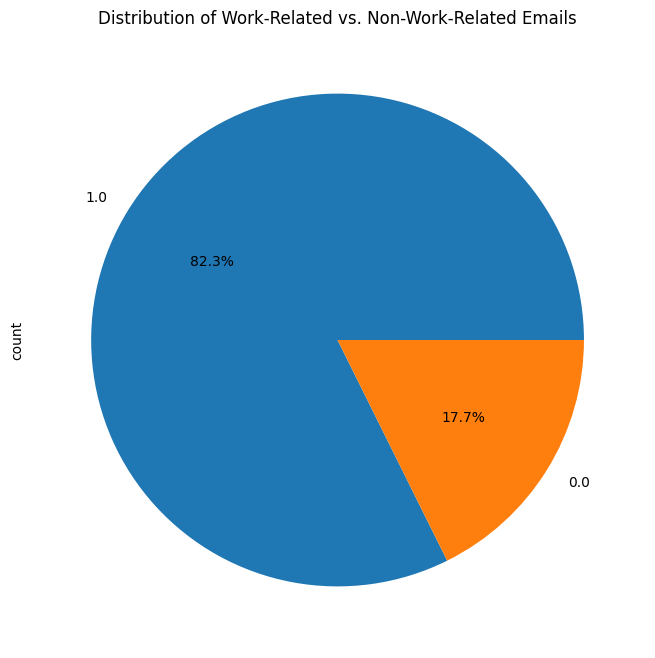

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Work-Related vs. Non-Work-Related Emails')
plt.show()

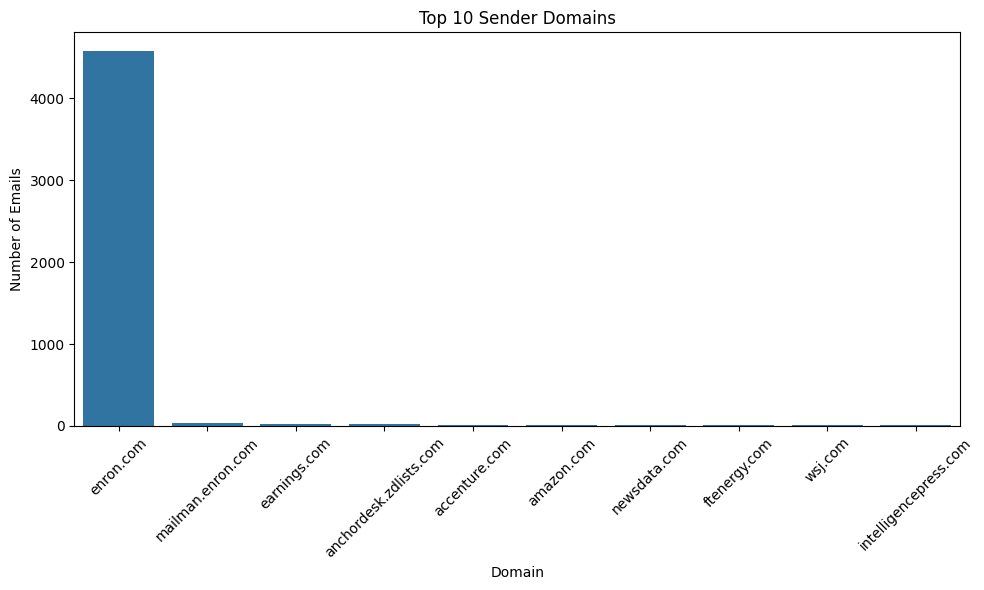

In [160]:
top_domains = df['email_domain'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_domains.index, y=top_domains.values)
plt.title('Top 10 Sender Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
import ssl
import re

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/ayushgala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushgala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayushgala/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [162]:
def load_glove_model(file_path):
    print("Loading GloVe model...")
    glove_model = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    print("GloVe model loaded.")
    return glove_model

# glove_model = load_glove_model('glove.42B.300d.txt')
glove_model = load_glove_model('glove.6B.100d.txt')

Loading GloVe model...
GloVe model loaded.


In [163]:
def get_vector(email_text, glove_model, vector_size=100):

    email_vector = np.zeros(vector_size)
    count = 0
    for token in email_text:
        if token in glove_model:
            email_vector += glove_model[token]
            count += 1
    if count > 0:
        email_vector /= count

    reduced_vector = 0

    for value in email_vector:
        reduced_vector += value
    reduced_vector = reduced_vector/count
        
    return reduced_vector

In [164]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

df['email_vector'] = df['message'].apply(lambda x: get_vector(preprocess_text(x), glove_model))

df['subject'] = df['subject'].astype(str)

df['subject_vector'] = df['subject'].apply(lambda x: get_vector(preprocess_text(x), glove_model))

/var/folders/73/qzhv0sd15qn8lzszbr3q7rzw0000gn/T/ipykernel_10295/4029756233.py:16: RuntimeWarning: invalid value encountered in scalar divide
  reduced_vector = reduced_vector/count


In [165]:
def encode_email(domain):
    if domain == 'enron.com':
        return 1
    else:
        return 0
    
df['domain_encoded'] = df['email_domain'].apply(lambda x: encode_email(x))

In [166]:
df

,file,message,label,sender_email,subject,num_receivers,email_length,email_domain,sent_time,is_forwarded,processed_content,dominant_topic,email_vector,subject_vector,domain_encoded
0,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,1.0,phillip.allen@enron.com,nan,1,16,enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0,"['thyme', 'date', 'mon', 'oct', 'pdt', 'subjec...",8,-0.082701,1.313602,1
1,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,1.0,phillip.allen@enron.com,Re: Hello,1,3,enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",0,"['thyme', 'date', 'thu', 'aug', 'pdt', 'subjec...",6,-0.091849,7.102338,1
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,1.0,phillip.allen@enron.com,Re: Hello,1,6,enron.com,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",0,"['thyme', 'date', 'thu', 'aug', 'pdt', 'subjec...",6,-0.101533,7.102338,1
3,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...,1.0,phillip.allen@enron.com,nan,2,24,enron.com,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",0,"['thyme', 'date', 'tue', 'aug', 'pdt', 'subjec...",8,-0.073441,1.313602,1
4,allen-p/_sent_mail/1004.,Message-ID: <17189699.1075863688308.JavaMail.e...,1.0,phillip.allen@enron.com,Re: PRC review - phone calls,1,2,enron.com,"Fri, 14 Jul 2000 06:59:00 -0700 (PDT)",0,"['thyme', 'date', 'fri', 'jul', 'pdt', 'subjec...",9,-0.071655,0.100251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,arnold-j/deleted_items/163.,Message-ID: <11958623.1075852694098.JavaMail.e...,1.0,karen.buckley@enron.com,Telephone Interviews: Trading Track,16,69,enron.com,"Wed, 10 Oct 2001 12:53:27 -0700 (PDT)",0,"['thyme', 'date', 'wed', 'oct', 'pdt', 'presto...",8,-0.019407,0.536497,1
5024,arnold-j/deleted_items/164.,Message-ID: <31095424.1075852694121.JavaMail.e...,1.0,a..shankman@enron.com,RE:,1,69,enron.com,"Wed, 10 Oct 2001 13:13:05 -0700 (PDT)",0,"['thyme', 'date', 'wed', 'oct', 'pdt', 'shankm...",6,-0.036784,NaN,1
5025,arnold-j/deleted_items/165.,Message-ID: <10513011.1075852694149.JavaMail.e...,1.0,karen.buckley@enron.com,ENA Trading Track - Interviews October,33,45,enron.com,"Wed, 10 Oct 2001 12:17:23 -0700 (PDT)",0,"['thyme', 'date', 'wed', 'oct', 'pdt', 'k', 'a...",8,-0.018556,-0.062973,1
5026,arnold-j/deleted_items/166.,Message-ID: <28097519.1075852694172.JavaMail.e...,0.0,margaret.allen@enron.com,THANKS!,1,25,enron.com,"Wed, 10 Oct 2001 09:00:39 -0700 (PDT)",0,"['thyme', 'date', 'wed', 'oct', 'pdt', 'subjec...",8,-0.065240,-5.126941,1


In [167]:
df.drop('file', axis=1, inplace=True)
df.drop('message', axis=1, inplace=True)
df.drop('subject', axis=1, inplace=True)
df.drop('processed_content', axis=1, inplace=True)
df.drop('email_domain', axis=1, inplace=True)
df.drop('sender_email', axis=1, inplace=True)
df.drop('sent_time', axis=1, inplace=True)
# df.drop('subject_vector', axis=1, inplace=True)


In [168]:
df

,label,num_receivers,email_length,is_forwarded,dominant_topic,email_vector,subject_vector,domain_encoded
0,1.0,1,16,0,8,-0.082701,1.313602,1
1,1.0,1,3,0,6,-0.091849,7.102338,1
2,1.0,1,6,0,6,-0.101533,7.102338,1
3,1.0,2,24,0,8,-0.073441,1.313602,1
4,1.0,1,2,0,9,-0.071655,0.100251,1
...,...,...,...,...,...,...,...,...
5023,1.0,16,69,0,8,-0.019407,0.536497,1
5024,1.0,1,69,0,6,-0.036784,NaN,1
5025,1.0,33,45,0,8,-0.018556,-0.062973,1
5026,0.0,1,25,0,8,-0.065240,-5.126941,1


In [169]:
y = df['label']
X = df.drop('label', axis=1)
X = X.fillna(0)

X

,num_receivers,email_length,is_forwarded,dominant_topic,email_vector,subject_vector,domain_encoded
0,1,16,0,8,-0.082701,1.313602,1
1,1,3,0,6,-0.091849,7.102338,1
2,1,6,0,6,-0.101533,7.102338,1
3,2,24,0,8,-0.073441,1.313602,1
4,1,2,0,9,-0.071655,0.100251,1
...,...,...,...,...,...,...,...
5023,16,69,0,8,-0.019407,0.536497,1
5024,1,69,0,6,-0.036784,0.000000,1
5025,33,45,0,8,-0.018556,-0.062973,1
5026,1,25,0,8,-0.065240,-5.126941,1


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(4022, 7)

In [172]:
X.isna().sum()

num_receivers     0
email_length      0
is_forwarded      0
dominant_topic    0
email_vector      0
subject_vector    0
domain_encoded    0
dtype: int64

In [173]:
#scale the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 # Train SVM model
print("Training SVM model...")
svm_model = SVC(kernel='rbf', C=100.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

Training SVM model...


SVC(C=100.0, random_state=42)

In [174]:
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
print("Model evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


Model evaluation:
              precision    recall  f1-score   support

         0.0       0.63      0.15      0.24       159
         1.0       0.86      0.98      0.92       847

    accuracy                           0.85      1006
   macro avg       0.75      0.57      0.58      1006
weighted avg       0.82      0.85      0.81      1006

Accuracy: 0.8518886679920478
0.9179063360881543


In [176]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

Training Random Forest model...


In [177]:
print("Model evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

Model evaluation:
Accuracy: 0.9095427435387674

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.62      0.68       159
         1.0       0.93      0.96      0.95       847

    accuracy                           0.91      1006
   macro avg       0.85      0.79      0.82      1006
weighted avg       0.90      0.91      0.91      1006

0.9472463768115942


In [178]:
# Feature importance
feature_importance = rf_model.feature_importances_
feature_importance_sorted = sorted(zip(feature_importance, range(len(feature_importance))), reverse=True)
print("\nTop 10 most important features:")
for importance, index in feature_importance_sorted[:10]:
    print(f"Feature {index}: {importance}")


Top 10 most important features:
Feature 4: 0.38988693792383594
Feature 1: 0.2411964396760699
Feature 5: 0.20551048434826488
Feature 3: 0.08982749034437994
Feature 6: 0.042204561443755416
Feature 0: 0.025982752126994323
Feature 2: 0.005391334136699642


In [179]:
X

,num_receivers,email_length,is_forwarded,dominant_topic,email_vector,subject_vector,domain_encoded
0,1,16,0,8,-0.082701,1.313602,1
1,1,3,0,6,-0.091849,7.102338,1
2,1,6,0,6,-0.101533,7.102338,1
3,2,24,0,8,-0.073441,1.313602,1
4,1,2,0,9,-0.071655,0.100251,1
...,...,...,...,...,...,...,...
5023,16,69,0,8,-0.019407,0.536497,1
5024,1,69,0,6,-0.036784,0.000000,1
5025,33,45,0,8,-0.018556,-0.062973,1
5026,1,25,0,8,-0.065240,-5.126941,1


In [180]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network model
def build_model(input_shape):
    model = Sequential([
        Dense(7, activation='relu', input_shape=(input_shape,)),
        Dropout(0.01),
        Dense(4, activation='relu'),
        Dropout(0.01),
        Dense(3, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Train the model
def train_model(model, X_train, y_train, X_test, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=2,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)
    
    return model, history

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.6).astype(int)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))




In [181]:
# Build and train the model
model = build_model(X_train_scaled.shape[1])
trained_model, history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1609/1609 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - accuracy: 0.8328 - loss: 0.4934 - val_accuracy: 0.7975 - val_loss: 0.4808
Epoch 2/100
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.8309 - loss: 0.4308 - val_accuracy: 0.7975 - val_loss: 0.4733
Epoch 3/100
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.8170 - loss: 0.4420 - val_accuracy: 0.7975 - val_loss: 0.4753
Epoch 4/100
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.8280 - loss: 0.4238 - val_accuracy: 0.7975 - val_loss: 0.4686
Epoch 5/100
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.8168 - loss: 0.4430 - val_accuracy: 0.7975 - val_loss: 0.4732
Epoch 6/100
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.8268 - loss: 0.4274 - val_accuracy: 0.7975 - val_loss: 0.4682
Epoch 7/100
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8216 - loss: 0.4302 - val_accuracy: 0.7975 - val_loss: 0.4659
Epoch 8/100
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.8282 - los

In [182]:
# Evaluate the model
evaluate_model(trained_model, X_test_scaled, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
Accuracy: 0.8558648111332008

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.17      0.27       159
         1.0       0.86      0.98      0.92       847

    accuracy                           0.86      1006
   macro avg       0.77      0.58      0.60      1006
weighted avg       0.83      0.86      0.82      1006



In [183]:
# Build and train the AdaBoost model
def build_and_train_adaboost(X_train, y_train):
    # Define the base estimator (Decision Tree)
    base_estimator = DecisionTreeClassifier(max_depth=1)
    
    # Define the AdaBoost classifier
    adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)
    
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    print("Best parameters:", grid_search.best_params_)
    
    return best_model

# Build and train the AdaBoost model
adaboost_model = build_and_train_adaboost(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [184]:

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate the model
evaluate_model(adaboost_model, X_test, y_test)

Accuracy: 0.8499005964214712
F1 Score: 0.7913767478512289

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.06      0.12       159
         1.0       0.85      1.00      0.92       847

    accuracy                           0.85      1006
   macro avg       0.84      0.53      0.52      1006
weighted avg       0.85      0.85      0.79      1006

